In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [124]:
# Create a list of all the LRP's of the bridges
df = pd.read_csv('Data_clean_N1_Dhaka_Chittagong_new.csv')
BridgeLRPlist = list()
for i in range(0,len(df)):
    if df.iloc[i,11] == 'BridgesDelay':
        BridgeLRPlist.append(df.iloc[i,3])

Text(0, 0.5, 'Average driving time \n (Averaged over all replications)')

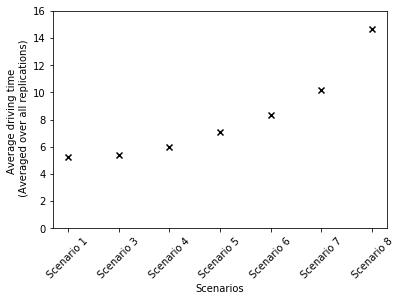

In [213]:
df = pd.read_csv('Basic Bitch Case_Model_Experiment1_ResultsSummary.csv',sep=';')
# Use this list to drop all the rows that are road points and not bridges
extra = ['Model', 'Rome' 'Source1', 'Trucks1']
for i in extra:
    BridgeLRPlist.append(i)
df_bridge = df[df['Object Name'].isin(BridgeLRPlist)]  
def replace(x):
    return x.replace(',', '.')
columns = list(df_bridge)[-5:]
for x in columns:
    df_bridge[x] = df_bridge[x].apply(replace)
    df_bridge[x] = df_bridge[x].astype(float)
dfp = df_bridge[df_bridge.Average != 0]
dfp = dfp[dfp['Data Item'] == 'TimeInSystem']
dfp = dfp[dfp['Statistic Type'] == 'Average (Hours)']
dfp.iloc[6,0] = 'Scenario 1'
dfs = dfp.sort_values(by = ['Scenario'],ascending = True)
x = dfs['Scenario']
y = dfs['Average']
plt.scatter(x, y, marker='x', color = 'black')
plt.xticks(rotation=45)
plt.ylim(0, 16)
plt.xlabel('Scenarios')
plt.ylabel('Average driving time \n (Averaged over all replications)')

In [214]:
plt.savefig('ScenarioDrivingTime.png')

<Figure size 432x288 with 0 Axes>

In [158]:
#df_bridge_plot = df_bridge[df_bridge['Statistic Type'] == 'Average'].reset_index() 
#df_bridge_plot['Value'].idxmax()

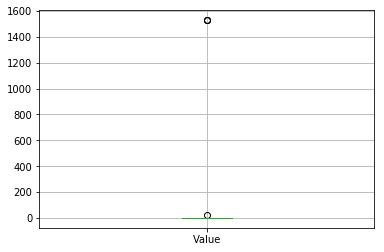

In [122]:
boxplot = df_bridge.boxplot(column=['Value'])

In [ ]:
# first define the ratios
r1 = 0.6       # 20%
r2 = r1 + 0.4  # 40%

# define some sizes of the scatter marker
sizes = np.array([2000, 2000, 2000])

# calculate the points of the first pie marker
#
# these are just the origin (0,0) +
# some points on a circle cos,sin
x = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
y = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
xy1 = np.column_stack([x, y])
s1 = np.abs(xy1).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
xy2 = np.column_stack([x, y])
s2 = np.abs(xy2).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy3 = np.column_stack([x, y])
s3 = np.abs(xy3).max()

x = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
y = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
xy4 = np.column_stack([x, y])
s4 = np.abs(xy4).max()

fig, ax = plt.subplots()
ax.scatter(range(4), range(4), marker=xy1,
           s=s1 ** 2 * sizes, facecolor='blue')
ax.scatter(range(4), range(4), marker=xy2,
           s=s2 ** 2 * sizes, facecolor='green')
ax.scatter(range(4), range(4), marker=xy3,
           s=s3 ** 2 * sizes, facecolor='red')
ax.scatter(range(4), range(4), marker=xy4,
           s=s3 ** 2 * sizes, facecolor='yellow')


plt.show()